In [25]:
import pandas as pd

# Carrega o CSV
df = pd.read_csv("../../data/campeonato-brasileiro-dataset.csv")

# Converte para JSON, orientado por registros e com indentação para melhor visualização
df.to_json("../../data/brasileirao_dates.json", orient="records", force_ascii=False, indent=4)

print("Arquivo JSON gerado com sucesso!")

Arquivo JSON gerado com sucesso!


In [26]:
import pandas as pd

# Carrega os dados do JSON
df = pd.read_json("../../data/brasileirao_dates.json")

# Exibe as primeiras linhas
print(df.head())

   ID  rodada       data   hora       mandante    visitante formacao_mandante  \
0   1       1  29/3/2003  16:00        Guarani        Vasco              None   
1   2       1  29/3/2003  16:00   Athletico-PR       Gremio              None   
2   3       1  30/3/2003  16:00       Flamengo     Coritiba              None   
3   4       1  30/3/2003  16:00          Goias     Paysandu              None   
4   5       1  30/3/2003  16:00  Internacional  Ponte Preta              None   

  formacao_visitante tecnico_mandante tecnico_visitante      vencedor  \
0               None             None              None       Guarani   
1               None             None              None  Athletico-PR   
2               None             None              None             -   
3               None             None              None             -   
4               None             None              None             -   

               arena  mandante_Placar  visitante_Placar mandante_Estado  \

In [27]:
import importlib
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

api = BrasileiraoAPI()
api.limpar_colecao()
json_path = "../../data/brasileirao_dates.json"  # ajuste conforme necessário
api.importar_json_para_mongodb(json_path)

Removidos 8025 documentos.
Inseridos 8025 documentos no MongoDB.


In [28]:
# Recarregar o módulo
import brasileirao_api
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

# Criar instância da API
api = BrasileiraoAPI()

try:
    # Obter todos os times
    times = api.obter_todos_times()
    
    # Ordenar alfabeticamente e apresentar de forma organizada
    print("\n=== Times do Brasileirão ===\n")
    for i, time in enumerate(sorted(times), 1):
        print(f"{i:2d}. {time}")
    print(f"\nTotal de times: {len(times)}")
    
except Exception as e:
    print(f"Erro ao consultar times: {str(e)}")


=== Times do Brasileirão ===

 1. America-MG
 2. America-RN
 3. Athletico-PR
 4. Atletico-GO
 5. Atletico-MG
 6. Avai
 7. Bahia
 8. Barueri
 9. Botafogo-RJ
10. Bragantino
11. Brasiliense
12. CSA
13. Ceara
14. Chapecoense
15. Corinthians
16. Coritiba
17. Criciuma
18. Cruzeiro
19. Cuiaba
20. Figueirense
21. Flamengo
22. Fluminense
23. Fortaleza
24. Goias
25. Gremio
26. Gremio Prudente
27. Guarani
28. Internacional
29. Ipatinga
30. Joinville
31. Juventude
32. Nautico
33. Palmeiras
34. Parana
35. Paysandu
36. Ponte Preta
37. Portuguesa
38. Santa Cruz
39. Santo Andre
40. Santos
41. Sao Caetano
42. Sao Paulo
43. Sport
44. Vasco
45. Vitoria

Total de times: 45


/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:165: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  todos_times = pd.unique(list(times_home) + list(times_away))


In [30]:
from brasileirao_api import BrasileiraoAPI
import importlib
import brasileirao_api

importlib.reload(brasileirao_api)
api = BrasileiraoAPI()

# Certifique-se de que os dados já estão no MongoDB (pode ser via CSV ou JSON)
tabelas_json = api.montar_tabelas(2003, 2022)
print(tabelas_json)

{
    "2003": {
        "Guarani": {
            "jogos": 46,
            "vitorias": 17,
            "empates": 10,
            "derrotas": 19,
            "gols_marcados": 64,
            "gols_sofridos": 72,
            "pontos": 61
        },
        "Vasco": {
            "jogos": 46,
            "vitorias": 13,
            "empates": 15,
            "derrotas": 18,
            "gols_marcados": 57,
            "gols_sofridos": 69,
            "pontos": 54
        },
        "Athletico-PR": {
            "jogos": 46,
            "vitorias": 17,
            "empates": 10,
            "derrotas": 19,
            "gols_marcados": 66,
            "gols_sofridos": 72,
            "pontos": 61
        },
        "Gremio": {
            "jogos": 46,
            "vitorias": 13,
            "empates": 11,
            "derrotas": 22,
            "gols_marcados": 54,
            "gols_sofridos": 68,
            "pontos": 50
        },
        "Flamengo": {
            "jogos": 46,
           

In [76]:
import json
import pandas as pd

# Carrega o JSON gerado pela função montar_tabelas ou pelo arquivo exportado
with open("../../data/tabelas_brasilerao-2003-2022.json", "r", encoding="utf-8") as f:
    tabelas = json.load(f)
    

print("\n=== Times do Brasileirão 2003 ===\n")
if "2003" in tabelas:
    dados_2003 = tabelas["2003"]
    # Converte o dicionário em DataFrame; as chaves (nomes dos times) serão os índices
    df_2003 = pd.DataFrame(dados_2003).T.reset_index().rename(columns={"index": "Time"})
    
    # Ordena pelo número de pontos em ordem decrescente
    df_2003 = df_2003.sort_values("pontos", ascending=False).reset_index(drop=True)
    
    
    
    df_2003['Posição'] = df_2003.index + 1
        
    display(df_2003[['Posição', 'Time', 'pontos', 'jogos', 'vitorias', 'empates', 'derrotas']])
else:
    print("Temporada 2003 não encontrada no JSON.")


=== Times do Brasileirão 2003 ===



,Posição,Time,pontos,jogos,vitorias,empates,derrotas
0,1,Cruzeiro,100,46,31,7,8
1,2,Santos,87,46,25,12,9
2,3,Sao Paulo,78,46,22,12,12
3,4,Coritiba,73,46,21,10,15
4,5,Atletico-MG,72,46,19,15,12
5,6,Sao Caetano,71,46,19,14,13
6,7,Internacional,70,46,20,10,16
7,8,Flamengo,66,46,18,12,16
8,9,Parana,65,46,18,11,17
9,10,Goias,65,46,18,11,17


In [75]:
from brasileirao_api import BrasileiraoAPI
import importlib
import brasileirao_api

importlib.reload(brasileirao_api)
api = BrasileiraoAPI()

# Limpa a coleção de odds se ela já existir
api.limpar_colecao_por_nome("odds_times_aggregados")

# Gera os odds agregados e exporta para JSON
odds_dados = api.gerar_odds_todos_times(2003, 2022,
                                        collection_name="odds_times_aggregados",
                                        output_path="../../data/odds_times_aggregados.json")
print(odds_dados)

Removidos 414 documentos da coleção 'odds_times_aggregados'.


/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:387: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_times = pd.unique(list(times_home) + list(times_away))
/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:387: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_times = pd.unique(list(times_home) + list(times_away))
/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:387: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_times = pd.unique(list(times_home) + list(times_away)

Inseridos 414 documentos na coleção 'odds_times_aggregados'.
Arquivo JSON com os odds de cada time criado em: ../../data/odds_times_aggregados.json
[{'time': 'Guarani', 'season': 2003, 'jogos': 46, 'vitorias': 17, 'empates': 10, 'derrotas': 19, 'gols_marcados': 64, 'gols_sofridos': 72, 'pontos': 61, 'odds': {'homeWin': 0.37, 'draw': 0.22, 'awayWin': 0.41}, '_id': ObjectId('67b1246d7a869bdaa594854a')}, {'time': 'Athletico-PR', 'season': 2003, 'jogos': 46, 'vitorias': 17, 'empates': 10, 'derrotas': 19, 'gols_marcados': 66, 'gols_sofridos': 72, 'pontos': 61, 'odds': {'homeWin': 0.37, 'draw': 0.22, 'awayWin': 0.41}, '_id': ObjectId('67b1246d7a869bdaa594854b')}, {'time': 'Flamengo', 'season': 2003, 'jogos': 46, 'vitorias': 18, 'empates': 12, 'derrotas': 16, 'gols_marcados': 66, 'gols_sofridos': 73, 'pontos': 66, 'odds': {'homeWin': 0.39, 'draw': 0.26, 'awayWin': 0.35}, '_id': ObjectId('67b1246d7a869bdaa594854c')}, {'time': 'Goias', 'season': 2003, 'jogos': 46, 'vitorias': 18, 'empates': 11,

/media/klsio27/outher-files/documentos/utfpr/nosql/cms-project/statistics_futebol/brazilian_data/brasileirao_api.py:387: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_times = pd.unique(list(times_home) + list(times_away))


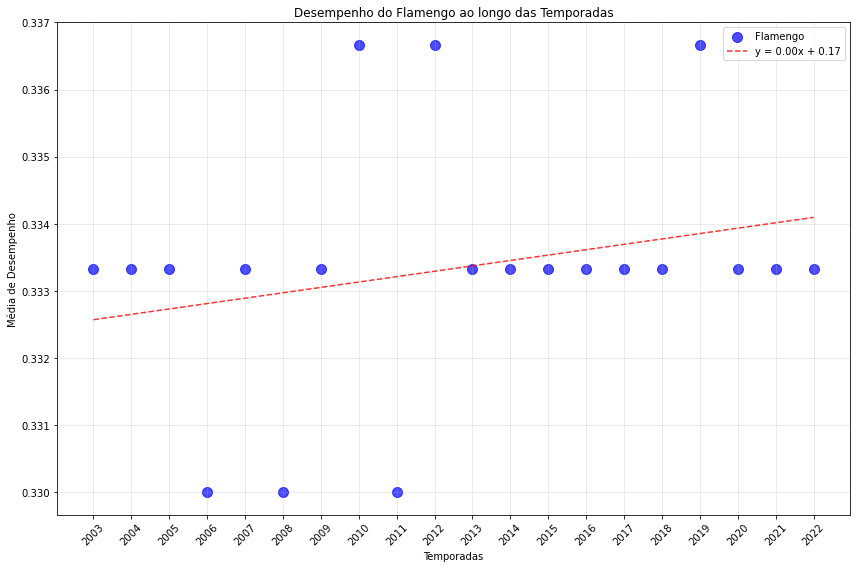

In [10]:
from brasileirao_api import BrasileiraoAPI

api = BrasileiraoAPI()
api.plot_desempenho_time("Flamengo")

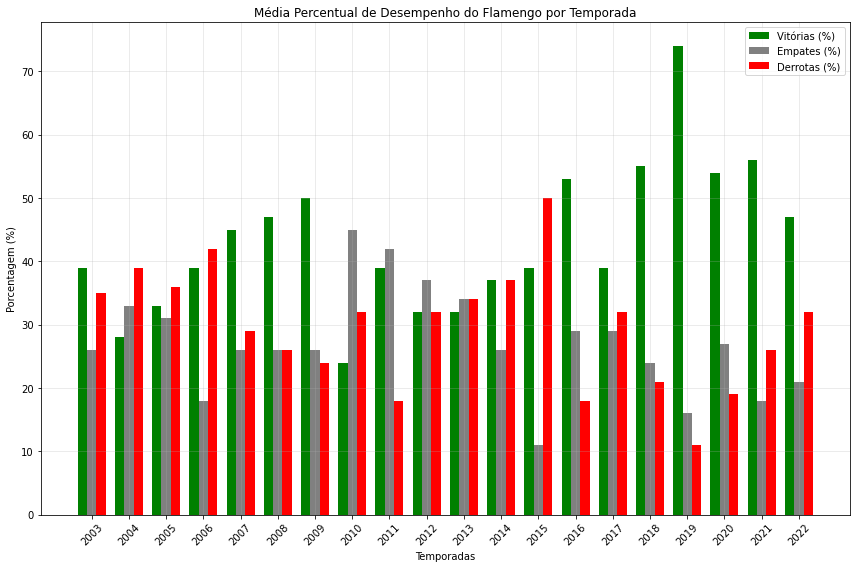

In [16]:
from brasileirao_api import BrasileiraoAPI
api = BrasileiraoAPI()
api.plot_media_porcentagem_time("Flamengo")

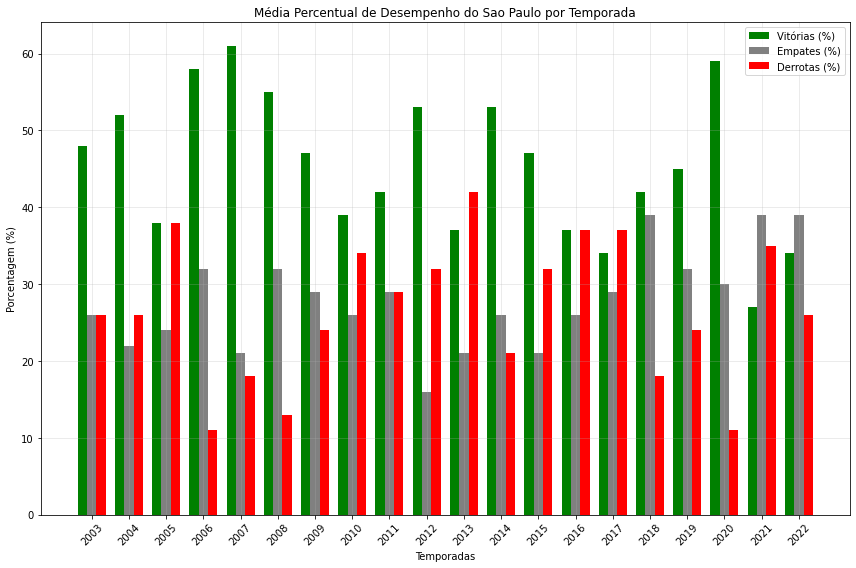

In [20]:
from brasileirao_api import BrasileiraoAPI

api = BrasileiraoAPI()
api.plot_media_porcentagem_time("Sao Paulo")

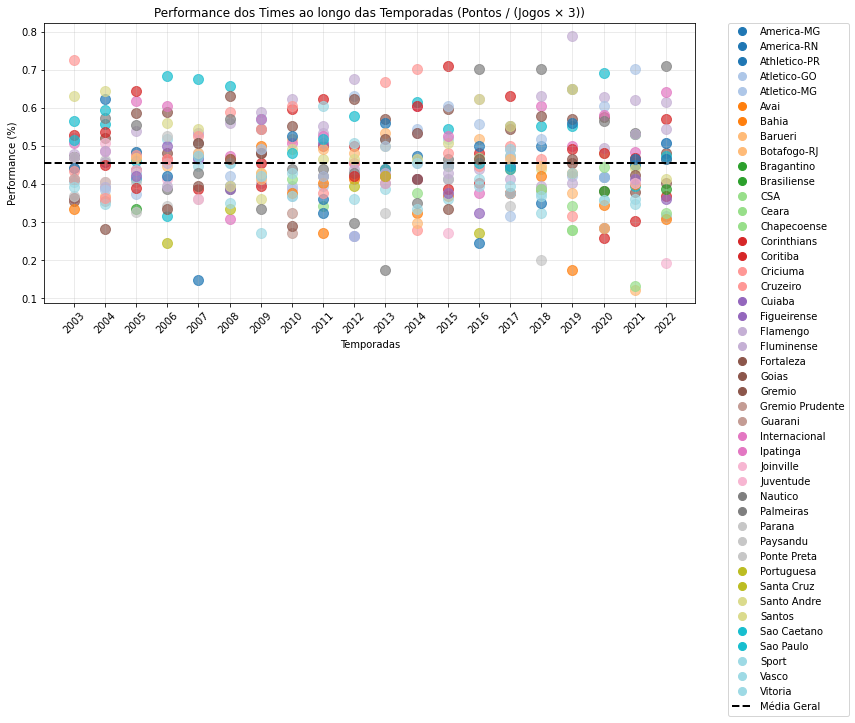

In [31]:
importlib.reload(brasileirao_api)
from brasileirao_api import BrasileiraoAPI

api = BrasileiraoAPI()
api.plot_desempenho_todos_times()

In [30]:
from brasileirao_api import BrasileiraoAPI
import importlib
import brasileirao_api

importlib.reload(brasileirao_api)
api = BrasileiraoAPI()

partidas_confronto = api.buscar_partidas_por_confronto("Flamengo", "Fluminense")
print(f"Partidas entre Flamengo e Fluminense: {len(partidas_confronto)}")

# Busca partidas utilizando operador OR
partidas_or = api.buscar_partidas_por_time_or("Flamengo", "Fluminense")
print(f"Partidas com Flamengo como mandante ou Fluminense como visitante: {len(partidas_or)}")

# Busca partidas pelas rodadas 1 e 2
partidas_rodadas = api.buscar_partidas_por_rodadas([1, 2])
print(f"Partidas das rodadas 1 e 2: {len(partidas_rodadas)}")

print("Estatísticas de vitórias e derrotas como mandante:")
stats = api.estatisticas_vitorias_derrotas_mandantes("Flamengo", "Fluminense")
for time, stat in stats.items():
    print(f"{time}: Vitórias = {stat['vitorias']}, Derrotas = {stat['derrotas']}")


Partidas entre Flamengo e Fluminense: 40
Partidas com Flamengo como mandante ou Fluminense como visitante: 759
Partidas das rodadas 1 e 2: 410
Estatísticas de vitórias e derrotas como mandante:
Flamengo: Vitórias = 7, Derrotas = 13
Fluminense: Vitórias = 6, Derrotas = 14


In [3]:
# Exibindo Total de gols por time
totais = api.agregacao_total_gols_por_time()
print("Total de gols por time:")
for item in totais:
    print(f"Time: {item['_id']:<20} | Total de gols: {item['total_gols']}")

print("\nMédia de gols por time:")
medias = api.agregacao_media_gols_por_time()
for item in medias:
    print(f"Time: {item['_id']:<20} | Média de gols: {item['media_gols']:.2f}")

print("\nMáximo de gols por time:")
maximos = api.agregacao_max_gols_por_time()
for item in maximos:
    print(f"Time: {item['_id']:<20} | Máximo: {item['max_gols']}")

print("\nMínimo de gols por time:")
minimos = api.agregacao_min_gols_por_time()
for item in minimos:
    print(f"Time: {item['_id']:<20} | Mínimo: {item['min_gols']}")

Total de gols por time:
Time: Paysandu             | Total de gols: 132
Time: Sao Caetano          | Total de gols: 120
Time: Vasco                | Total de gols: 437
Time: Botafogo-RJ          | Total de gols: 498
Time: Fluminense           | Total de gols: 594
Time: Atletico-MG          | Total de gols: 649
Time: Santos               | Total de gols: 702
Time: Ipatinga             | Total de gols: 28
Time: Avai                 | Total de gols: 171
Time: Atletico-GO          | Total de gols: 158
Time: Joinville            | Total de gols: 19
Time: Sao Paulo            | Total de gols: 656
Time: Santa Cruz           | Total de gols: 50
Time: Chapecoense          | Total de gols: 149
Time: Nautico              | Total de gols: 131
Time: Brasiliense          | Total de gols: 26
Time: Ceara                | Total de gols: 160
Time: Gremio Prudente      | Total de gols: 25
Time: Bragantino           | Total de gols: 91
Time: America-MG           | Total de gols: 112
Time: Corinthians     

In [8]:
from brasileirao_api import BrasileiraoAPI

api = BrasileiraoAPI()
api.fazer_backup("brazileirao-data-analysis")

Backup da collection tabelas_brasilerao-2003-2022 salvo em: /media/klsio27/outher-files/documentos/utfpr/nosql/brazileirao-data-analysis/statistics_futebol/backup/brazileirao-data-analysis/backup/brazileirao-data-analysis_backup_20250217_015533/tabelas_brasilerao-2003-2022.json
Backup da collection brasileirao salvo em: /media/klsio27/outher-files/documentos/utfpr/nosql/brazileirao-data-analysis/statistics_futebol/backup/brazileirao-data-analysis/backup/brazileirao-data-analysis_backup_20250217_015533/brasileirao.json
Backup da collection odds_times_aggregados salvo em: /media/klsio27/outher-files/documentos/utfpr/nosql/brazileirao-data-analysis/statistics_futebol/backup/brazileirao-data-analysis/backup/brazileirao-data-analysis_backup_20250217_015533/odds_times_aggregados.json

Backup completo do banco brazileirao-data-analysis salvo em: /media/klsio27/outher-files/documentos/utfpr/nosql/brazileirao-data-analysis/statistics_futebol/backup/brazileirao-data-analysis/backup/brazileirao-d

'/media/klsio27/outher-files/documentos/utfpr/nosql/brazileirao-data-analysis/statistics_futebol/backup/brazileirao-data-analysis/backup/brazileirao-data-analysis_backup_20250217_015533'